In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


In [3]:
bike_df = pd.read_csv("day.csv")

## Data Understanding

In [4]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# check for missing values, if any

dictionary = {}
for column in bike_df:
    dictionary[column] = bike_df[column].isna().sum()
dictionary

{'instant': 0,
 'dteday': 0,
 'season': 0,
 'yr': 0,
 'mnth': 0,
 'holiday': 0,
 'weekday': 0,
 'workingday': 0,
 'weathersit': 0,
 'temp': 0,
 'atemp': 0,
 'hum': 0,
 'windspeed': 0,
 'casual': 0,
 'registered': 0,
 'cnt': 0}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

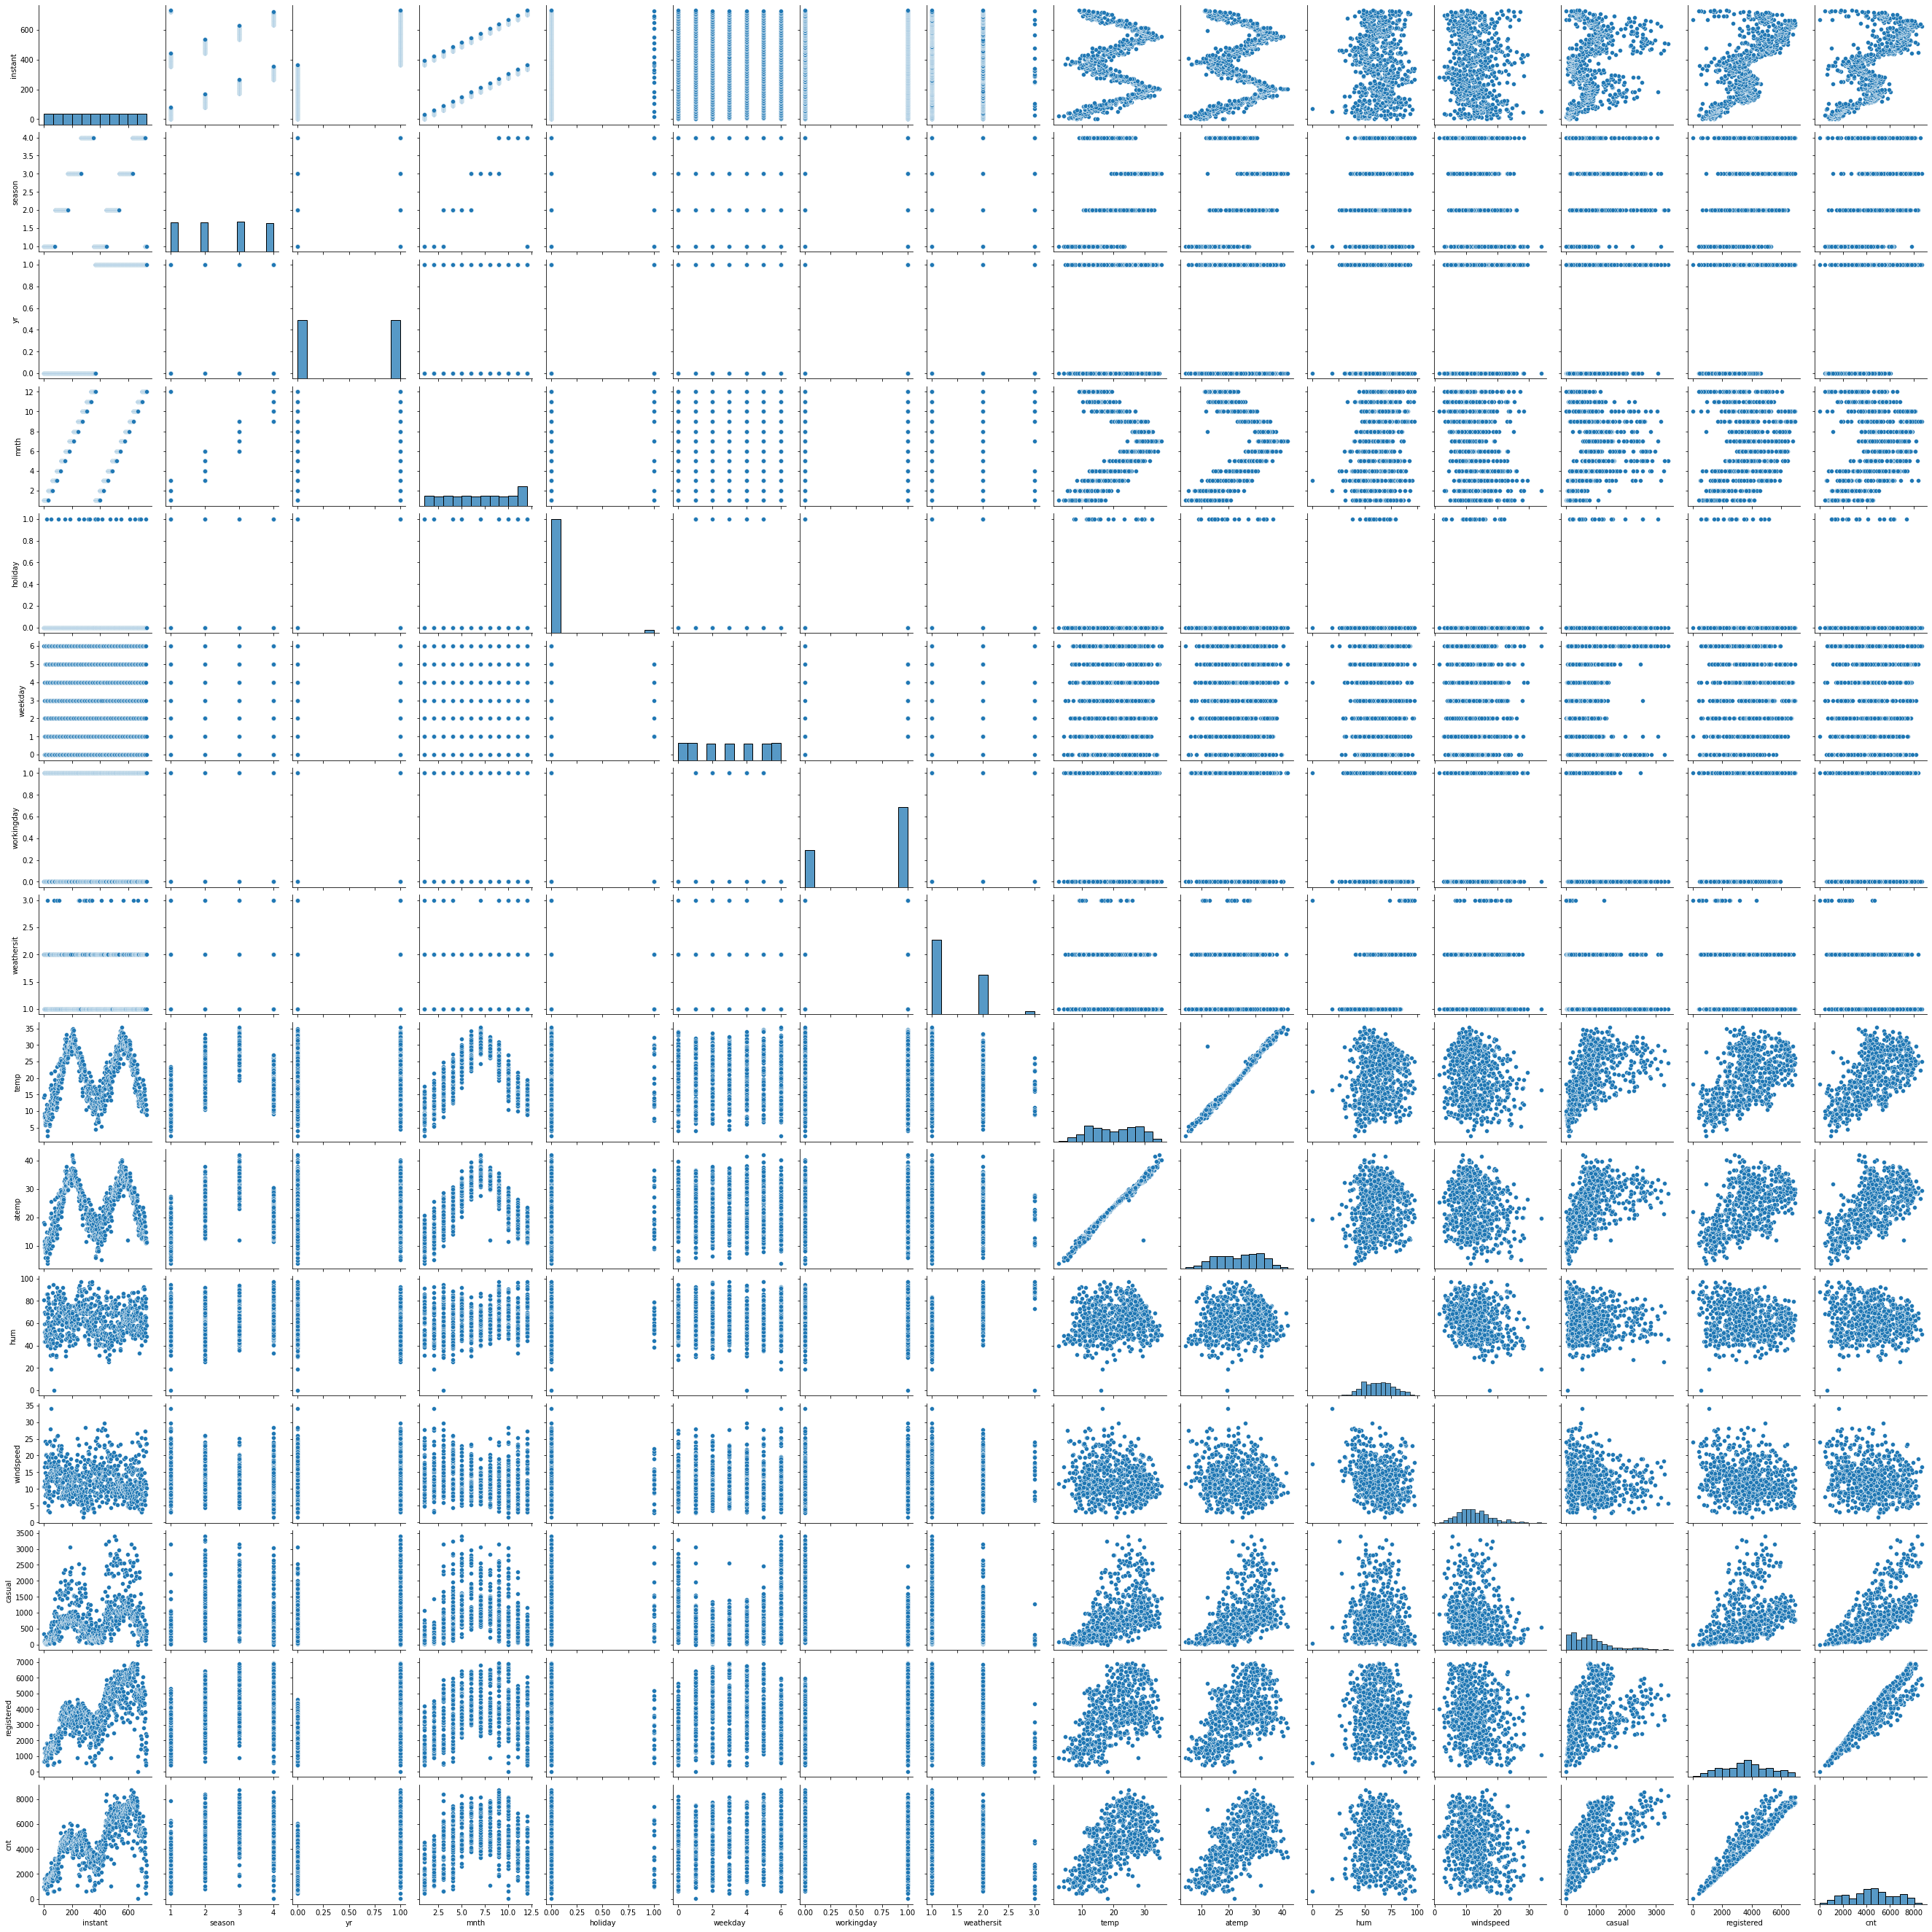

In [10]:
sns.pairplot(bike_df)
plt.show()

## Data cleaning

### The variables instant, dteday, casual and registered doesnt adds value to the analysis and can be deleted

In [11]:
irrelevant_cols = ['instant', 'dteday', 'casual', 'registered']

In [12]:
bike_df.drop(irrelevant_cols, axis = 1, inplace = True)

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
continuous_cols = ['temp','atemp', 'hum', 'windspeed', 'cnt']

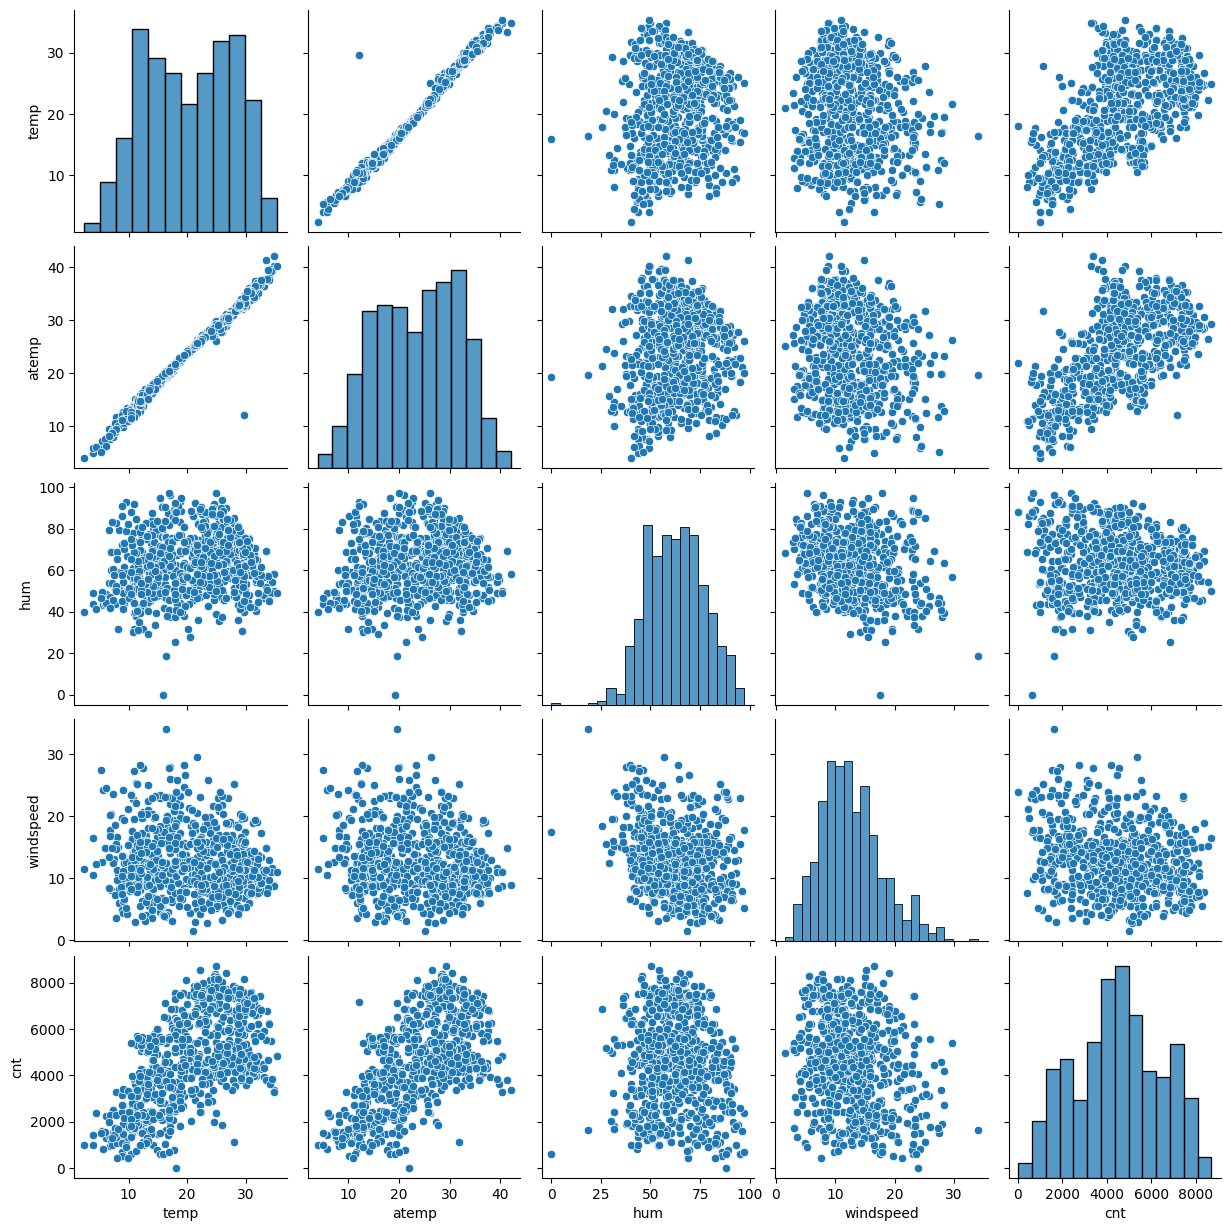

In [15]:
# visualize the relationship between continuous variables using pair plot

sns.pairplot(bike_df, vars=continuous_cols)
plt.show()

In [16]:
categorical_cols = ['season', 'mnth','weekday', 'weathersit']

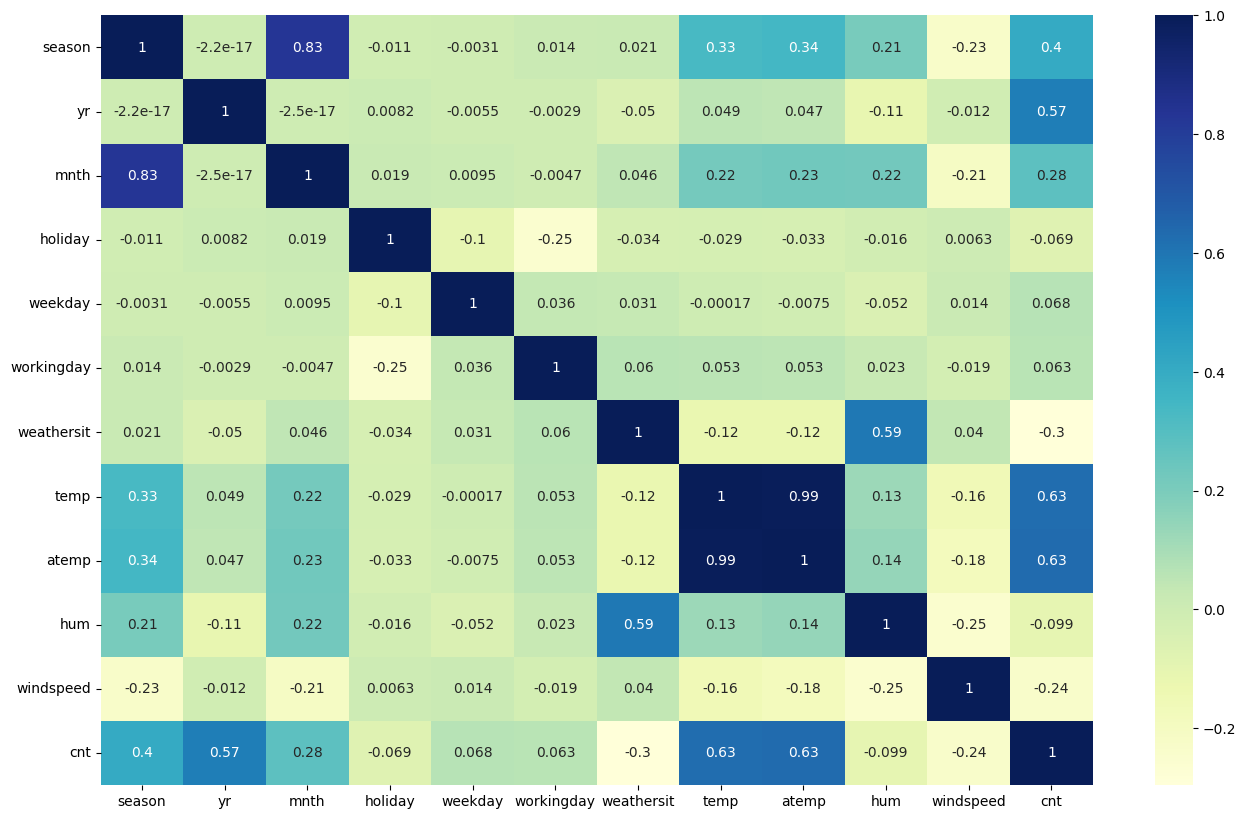

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

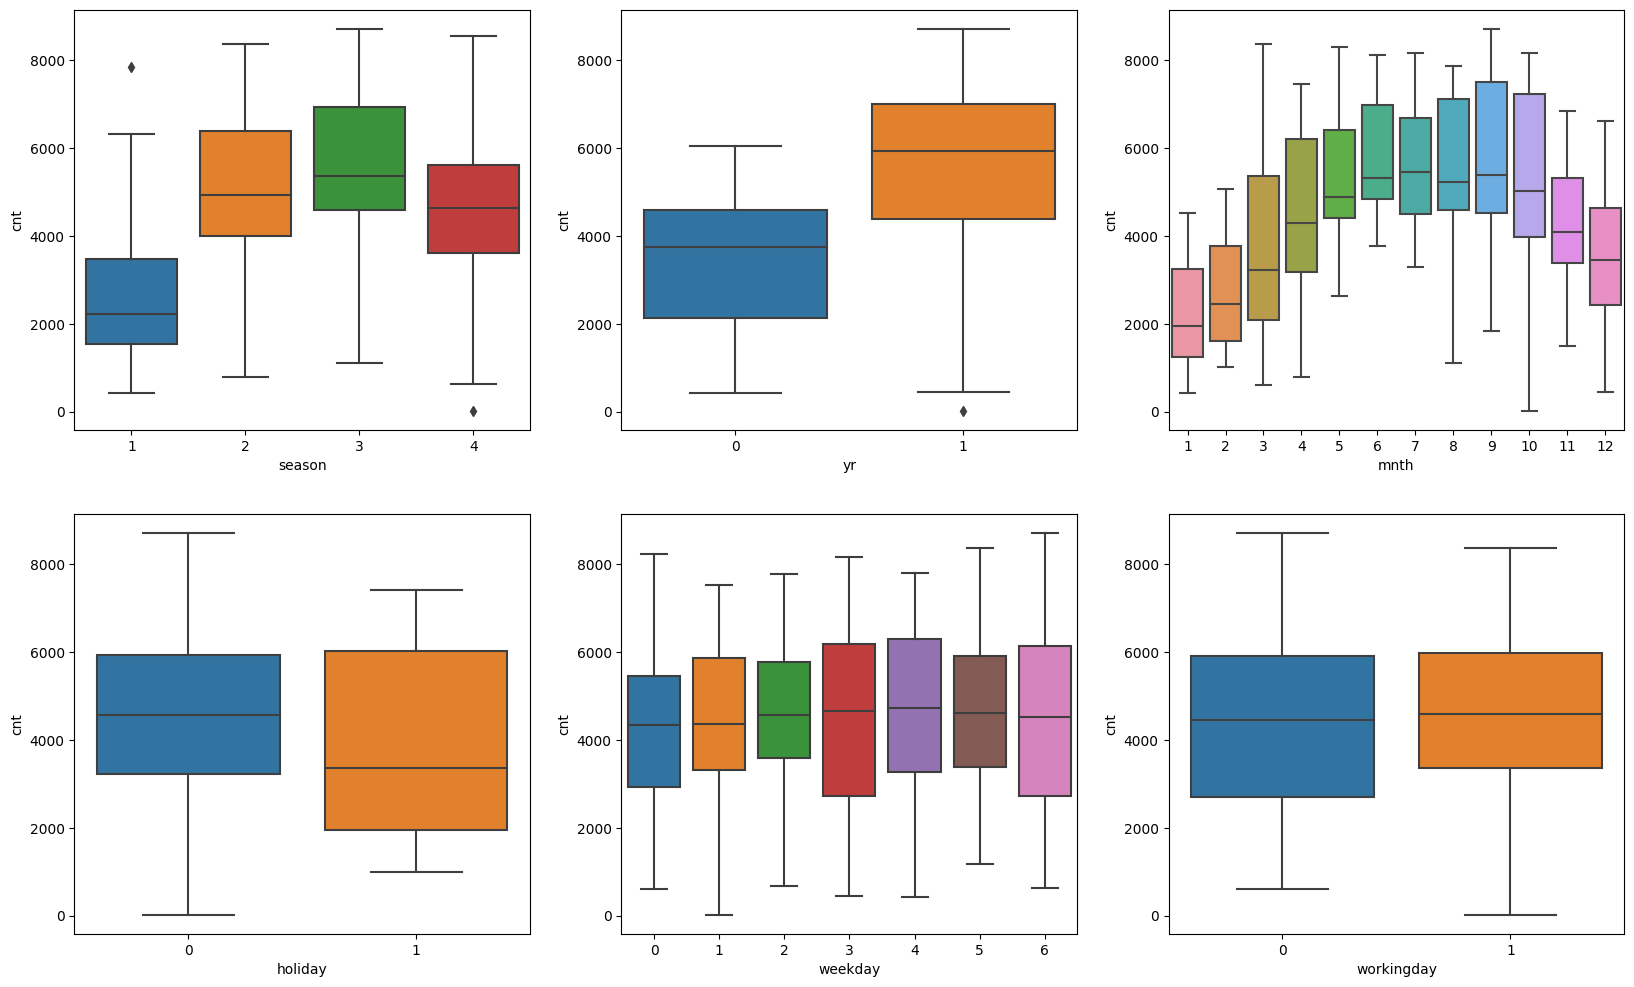

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

### Remove temp column as it is very highly correlated with atemp column

In [117]:
bike_df.drop(['temp'], axis = 1, inplace = True)

## Change Categorical columns values to meaningful text for dummy encoding

In [118]:
bike_df['season'] = bike_df[['season']].apply(lambda x : x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))

In [119]:
bike_df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [120]:
bike_df['mnth'] = bike_df[['mnth']].apply(lambda x : x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}))

In [121]:
bike_df['mnth'] 

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [122]:
bike_df['weekday'] = bike_df[['weekday']].apply(lambda x : x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}))

In [123]:
bike_df['weekday']

0      Sat
1      Sun
2      Mon
3      Tue
4      Wed
      ... 
725    Thu
726    Fri
727    Sat
728    Sun
729    Mon
Name: weekday, Length: 730, dtype: object

In [124]:
bike_df['weathersit'] = bike_df[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist',3:'lightsnow',4:'heavyrain'}))

In [125]:
bike_df['weathersit']

0       mist
1       mist
2      clear
3      clear
4      clear
       ...  
725     mist
726     mist
727     mist
728    clear
729     mist
Name: weathersit, Length: 730, dtype: object

### Dummy encoding

In [126]:
dummies = pd.get_dummies(bike_df[categorical_cols],drop_first = True)
bike_df_dummies = pd.concat([bike_df, dummies], axis = 1)

In [127]:
bike_df_dummies.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_lightsnow,weathersit_mist
0,spring,0,Jan,0,Sat,0,mist,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,mist,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [128]:
bike_df_dummies.drop(categorical_cols, axis = 1, inplace = True)

In [129]:
corr_matrix = bike_df_dummies.corr().corr()

In [130]:
corr_matrix["cnt"].sort_values(ascending=False)

cnt                     1.000000
atemp                   0.836664
yr                      0.628886
mnth_Jun                0.401543
mnth_Jul                0.382491
mnth_Aug                0.369565
mnth_Sep                0.317127
season_summer           0.308243
mnth_May                0.265797
mnth_Oct                0.141723
workingday              0.090144
weekday_Thu             0.058950
season_winter           0.044140
weekday_Wed             0.024385
weekday_Tue             0.006443
weekday_Sat            -0.014949
hum                    -0.048834
mnth_Nov               -0.052454
weekday_Mon            -0.058122
weekday_Sun            -0.065864
holiday                -0.137950
weathersit_mist        -0.270146
mnth_Mar               -0.306439
mnth_Dec               -0.323946
weathersit_lightsnow   -0.351675
windspeed              -0.445483
mnth_Feb               -0.529811
mnth_Jan               -0.639787
season_spring          -0.788326
Name: cnt, dtype: float64

## Spliting data between Training set and Testing sets

In [131]:
bike_df_train, bike_df_test = train_test_split(bike_df_dummies, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling data - Min-Max scaling to compress data between range

In [132]:
continuous_cols = ['atemp', 'hum', 'windspeed', 'cnt']

In [133]:
scale = MinMaxScaler()

In [134]:
bike_df_train[continuous_cols] = scale.fit_transform(bike_df_train[continuous_cols])

In [135]:
bike_df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_lightsnow,weathersit_mist
367,1,0,1,0.061963,0.454701,0.695175,0.254717,1,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.462175,0.477458,0.299450,0.868385,0,0,1,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,0.419099,0.387290,0.807474,0.217556,1,0,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.318824,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.108365,0.431945,0.449210,0.263346,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [136]:
bike_y_train = bike_df_train.pop('cnt')
bike_X_train = bike_df_train

## Building the linear model with all the variables


In [137]:
X_train_lm = sm.add_constant(bike_X_train)
lr_1 = sm.OLS(bike_y_train, X_train_lm).fit()
lr_1.params

const                   0.255205
yr                      0.231145
holiday                 0.017735
workingday              0.103480
atemp                   0.426223
hum                    -0.140107
windspeed              -0.163587
season_spring          -0.062888
season_summer           0.034302
season_winter           0.102519
mnth_Aug                0.036037
mnth_Dec               -0.059176
mnth_Feb               -0.035281
mnth_Jan               -0.067124
mnth_Jul               -0.017883
mnth_Jun                0.026899
mnth_Mar                0.001317
mnth_May                0.029101
mnth_Nov               -0.055278
mnth_Oct                0.014074
mnth_Sep                0.086006
weekday_Mon            -0.028638
weekday_Sat             0.097403
weekday_Sun             0.036586
weekday_Thu            -0.012540
weekday_Tue            -0.025799
weekday_Wed            -0.009378
weathersit_lightsnow   -0.260058
weathersit_mist        -0.060177
dtype: float64

In [138]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     123.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.50e-214
Time:                        11:56:47   Log-Likelihood:                 609.09
No. Observations:                 584   AIC:                            -1162.
Df Residuals:                     556   BIC:                            -1040.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2552 

### Calculate VIF

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = bike_X_train.columns
vif['VIF'] = [variance_inflation_factor(bike_X_train.values, i) for i in range(bike_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.29
22,weekday_Sun,20.03
21,weekday_Sat,19.59
6,season_spring,10.76
8,season_winter,8.80
7,season_summer,8.24
18,mnth_Oct,6.84
17,mnth_Nov,6.37
3,atemp,6.01
12,mnth_Jan,6.00


In [140]:
# dropping highly correlated variable - mnth_Mar which is having a very high p value of .955
X = bike_X_train.drop('mnth_Mar', 1,)

In [142]:
# Build again a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(bike_y_train, X_train_lm).fit()

In [143]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.31e-215
Time:                        12:00:22   Log-Likelihood:                 609.09
No. Observations:                 584   AIC:                            -1164.
Df Residuals:                     557   BIC:                            -1046.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2559 

In [145]:
# dropping highly correlated variable - mnth_Oct which is having a very high p value of .63
X = X.drop('mnth_Oct', 1,)

In [146]:
# Build again a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(bike_y_train, X_train_lm).fit()

In [147]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.26e-216
Time:                        12:02:43   Log-Likelihood:                 608.97
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     558   BIC:                            -1052.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2592 

## Recursive Feature elimination

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [152]:
# Running RFE
lm = LinearRegression()
lm.fit(X, bike_y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X, bike_y_train)

In [153]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 10),
 ('mnth_Jun', False, 7),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Sep', False, 2),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 14),
 ('weathersit_lightsnow', True, 1),
 ('weathersit_mist', True, 1)]

In [159]:
valid_columns = X.columns[rfe.support_]
valid_columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'weekday_Sat',
       'weathersit_lightsnow', 'weathersit_mist'],
      dtype='object')

In [160]:
X.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jul',
       'mnth_Jun', 'mnth_May', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### The highly correlated columns suggested by RFE also have a high p-value, so can be removed 
Removing the columns

In [161]:
X_train_valid_cols = X[valid_columns]

In [162]:
# Build again a fitted model
X_train_lm = sm.add_constant(X_train_valid_cols)

lr_2 = sm.OLS(bike_y_train, X_train_lm).fit()

In [163]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.03e-218
Time:                        12:13:25   Log-Likelihood:                 581.51
No. Observations:                 584   AIC:                            -1135.
Df Residuals:                     570   BIC:                            -1074.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3211 

### All the variables listed in above summary have p-values as 0. So all the variables  can be considered for the final model

In [164]:
# recalculating the VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_valid_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_valid_cols.values, i) for i in range(X_train_valid_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.41
2,atemp,15.51
1,workingday,4.44
4,windspeed,4.14
5,season_spring,2.97
6,season_winter,2.72
12,weathersit_mist,2.29
0,yr,2.07
10,weekday_Sat,1.77
8,mnth_Jan,1.70


### Residual Analysis of the train data

In [166]:
y_train_cnt = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

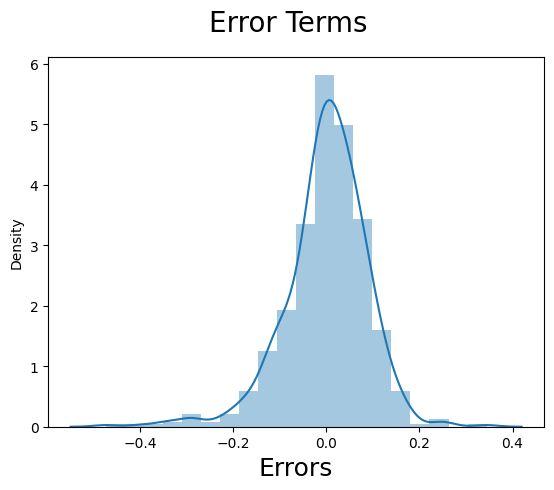

In [167]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((bike_y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions Using the Final Model

In [169]:
# Applying the scaling on the test sets
bike_df_test[continuous_cols] = scale.transform(bike_df_test[continuous_cols])

In [170]:
bike_df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_lightsnow,weathersit_mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,...,0.054795,0.089041,0.123288,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068
std,0.498699,0.182488,0.436469,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,...,0.228362,0.285783,0.329899,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
X_test_valid_cols = bike_df_test[valid_columns]

In [172]:
X_test_valid_cols

,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,weekday_Sat,weathersit_lightsnow,weathersit_mist
184,0,0,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1
535,1,1,0.842587,0.610133,0.153728,0,0,0,0,0,0,0,0
299,0,1,0.496145,0.837699,0.334206,0,1,0,0,0,0,0,1
221,0,1,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,0
152,0,1,0.741471,0.314298,0.537414,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,1,0.819364,0.610133,0.322193,0,0,0,0,0,0,0,0
719,1,1,0.292320,0.573637,0.713904,1,0,1,0,0,0,0,1
3,0,1,0.174649,0.608434,0.253659,1,0,0,1,0,0,0,0
392,1,0,0.324627,0.559896,0.362295,1,0,0,1,0,1,0,0


In [174]:
# Adding constant variable to test dataframe
X_test_model = sm.add_constant(X_test_valid_cols)

In [175]:
y_pred_model = lr_2.predict(X_test_model)

### Model Evaluation

In [176]:
y_test = bike_df_test.pop('cnt')

Text(0, 0.5, 'y_pred')

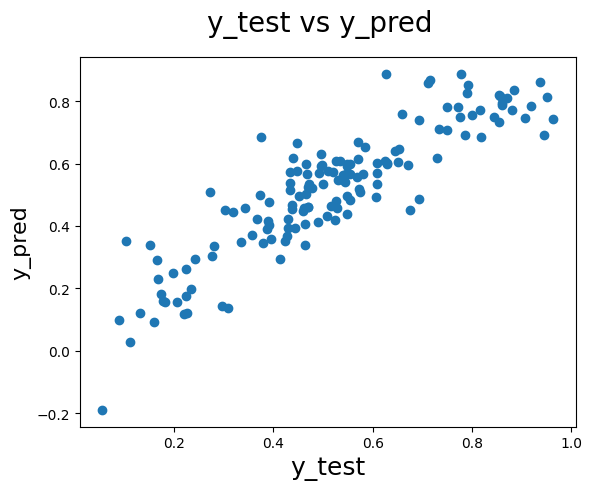

In [177]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_model)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

### Residual analysis of test data

Text(0.5, 0, 'Errors')

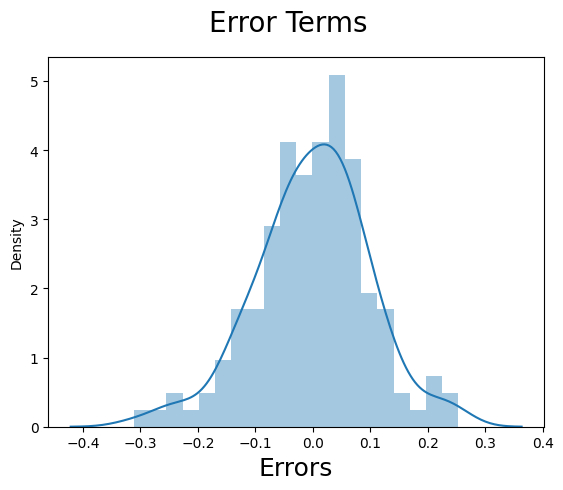

In [178]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_model), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label